In [6]:
from google.colab import files
 
 
uploaded = files.upload()

Saving capstone E.csv to capstone E (1).csv


Epoch 1/1000
24/24 [==============================] - 11s 379ms/step - loss: 22730.5547
Epoch 2/1000
24/24 [==============================] - 7s 290ms/step - loss: 236.4166
Epoch 3/1000
24/24 [==============================] - 7s 286ms/step - loss: 254.3307
Epoch 4/1000
24/24 [==============================] - 3s 145ms/step - loss: 235.4527
Epoch 5/1000
24/24 [==============================] - 3s 145ms/step - loss: 224.1306
Epoch 6/1000
24/24 [==============================] - 4s 146ms/step - loss: 224.5595
Epoch 7/1000
24/24 [==============================] - 3s 144ms/step - loss: 207.5216
Epoch 8/1000
24/24 [==============================] - 4s 147ms/step - loss: 181.6092
Epoch 9/1000
24/24 [==============================] - 3s 145ms/step - loss: 195.9111
Epoch 10/1000
24/24 [==============================] - 4s 147ms/step - loss: 187.8943
Epoch 11/1000
24/24 [==============================] - 3s 145ms/step - loss: 145.0854
Epoch 12/1000
24/24 [==============================] - 3s 14

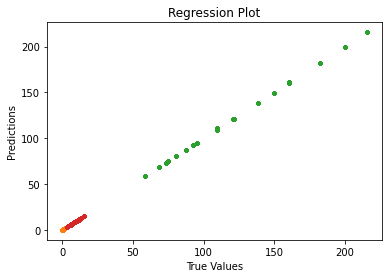

R_sq =  0.9999999999999998
1/1 [==============================] - 0s 95ms/step
[[-1.0116961  1.1871998 53.808746  -0.1522522]]


In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

# Load the data
data = pd.read_csv('capstone E.csv')

# Split the data into input (X) and output (y) variables
X = data[['FuelBlend', 'RPM']].values
y = data[['CO', 'CO2', 'HC', 'NO']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Define the model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=2000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=3000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=2000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4))


# Compile the model
ann.compile(optimizer="adam",loss="MeanSquaredError")

# Train the model
history = ann.fit(X, y, epochs=1000, batch_size=30)

# Make predictions on the test data
predictions = ann.predict(X)
ann.summary()

# Plot the predictions vs the true values
plt.plot(y, predictions, '.')
plt.title('Regression Plot')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

corr_matrix = np.corrcoef(y, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print('R_sq = ', R_sq)
print(ann.predict(sc.transform([[0,1000]])))
